In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.cm as cm

In [2]:
data = np.loadtxt('f3_inline296_X301-1000_t1320-1848.dat').T

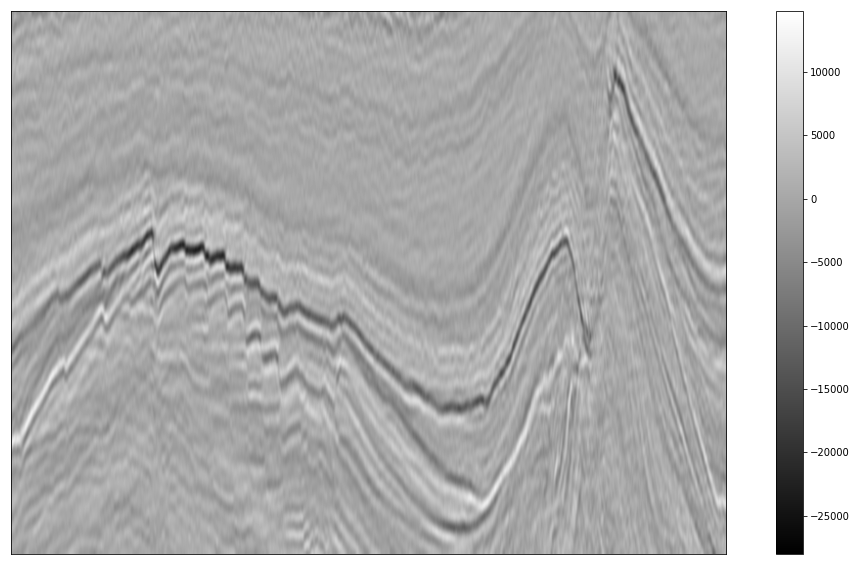

In [3]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data, cmap='gray', aspect = 4, interpolation = 'bicubic')
plt.colorbar()
plt.show()


#### Scaling seismic data to [-128 +128] range, centered around 0, using limits proportional to input

In [4]:
print data.min(), data.max()

-28026.0 14817.0


In [5]:
data_n=(data-data.min())/(data.max()-data.min())

data_sc =  128*(data_n * (data.max()/abs(data.min()) - (-1)) + (-1))

print data_n.min(), data_n.max()
print data_sc.min(), data_sc.max()


0.0 1.0
-128.0 67.6720188396


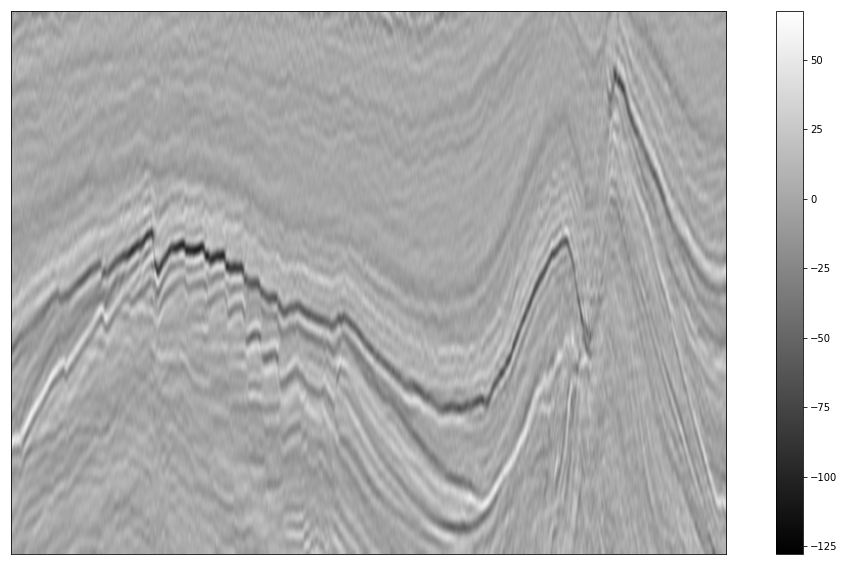

In [6]:
fig = plt.figure(figsize=(18,10))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(data_sc, cmap='gray', aspect = 4, interpolation = 'bicubic')
plt.colorbar()
plt.show()

#fig.savefig('data.png', dpi=200, bbox_inches='tight', pad_inches=0)

#### Compare colormap with different sigmoid values

Using a list comprehension syntax for the sigmoid function in order to make subplots.

In [7]:
# list of sigmoid widths

ws = [-2.75, -2.25, -1.75, -1.25, -0.75, -0.25, 0.25, 0.75, 1.25, 1.75, 2.25, 2.75]

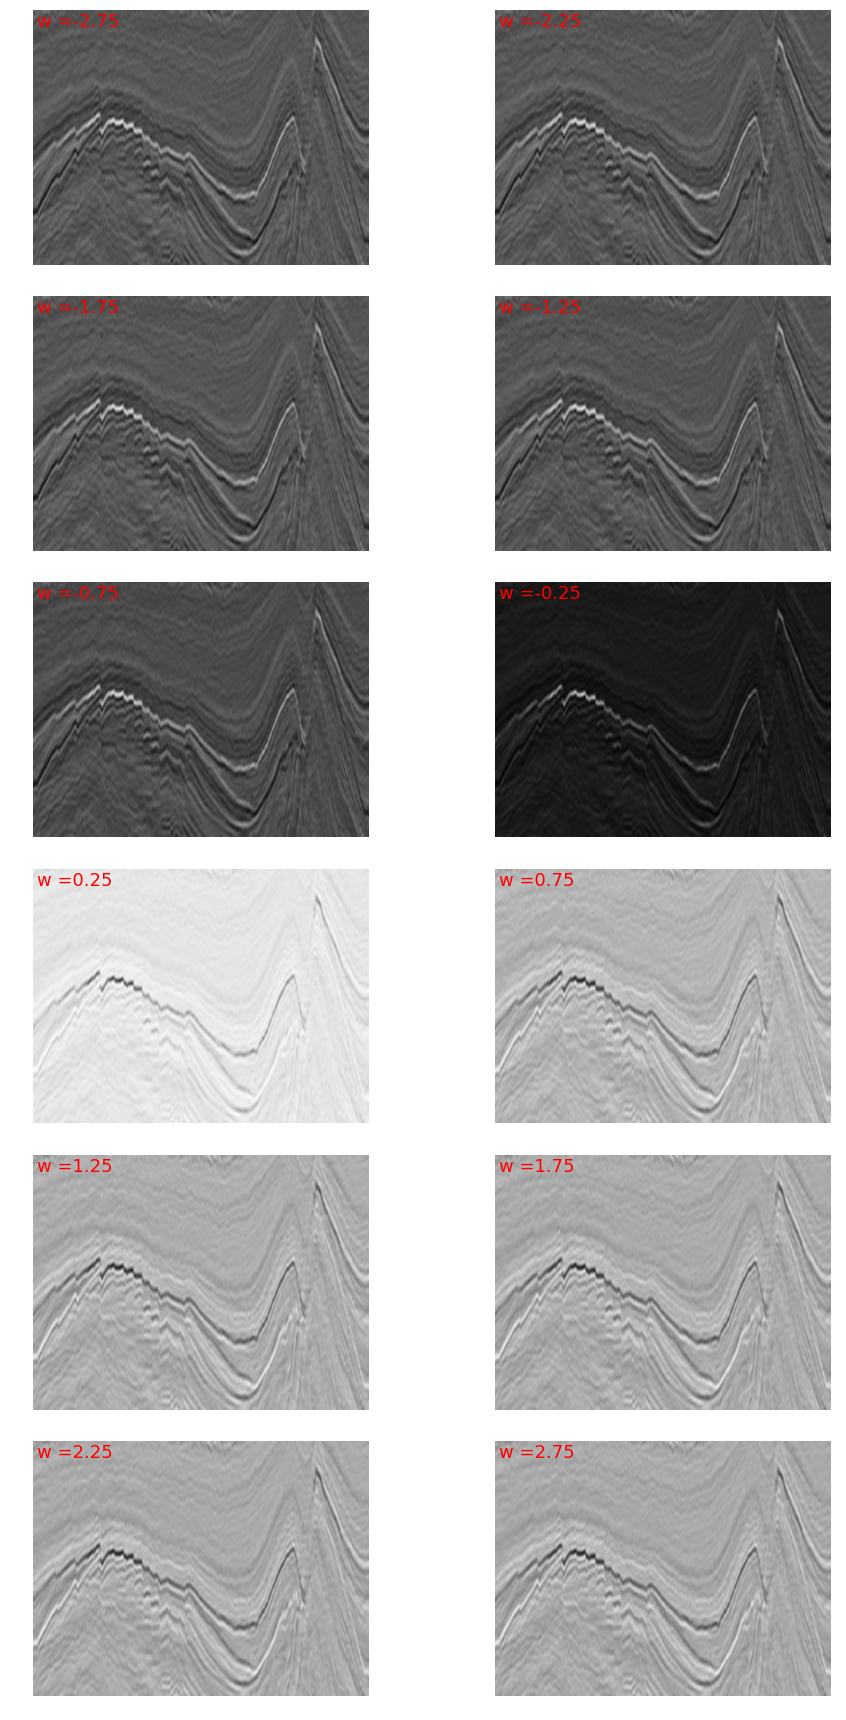

In [8]:
fig, axs = plt.subplots(6,2, figsize=(14, 24))
axs = axs.ravel()

for i, w in zip(np.arange(22), ws):
    axs[i].imshow(1 / (1 + np.exp(-data_n[:,:]/w+0.001)), cmap='gray', aspect = 4, interpolation = 'bicubic')
    axs[i].axis('off')
    axs[i].text(8, 8, 'w =' + str(w), fontsize=18, color = 'r')

plt.tight_layout()
plt.show()
